# **Prática 3 - Fundamentos de Informática em Imagens Médicas**

In [ ]:
pip install pynrrd

Importando as bibliotecas

In [ ]:
import os
import shutil
import pandas as pd
import nrrd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import tensorflow as tf

Montando o Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_mask = "/content/drive/MyDrive/Imagens/3-Segmentation_NRRD"
os.chdir(path_mask)
masks = dict()
masks_header = dict()

sub1 = '3-Segmentation_NRRD/'
sub2= '.seg.nrrd'

for file in os.listdir():
    if file.endswith('.nrrd'):
        file_path = f'{path_mask}/{file}' # path_mask + '/' + file
        #print(file_path)
        idx1 = file_path.index(sub1)
        idx2 = file_path.index(sub2)

        res =''
        for idx in range(idx1 +len(sub1), idx2):
            res = res + file_path[idx]


        masks[res],masks_header[res] = nrrd.read(file_path)


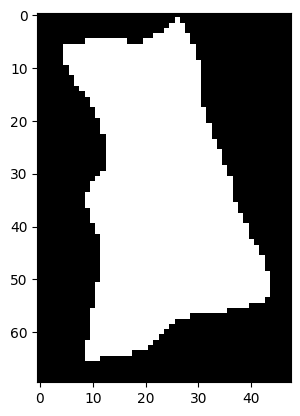

In [ ]:
plt.imshow(masks['P1L1'][:,:,2], cmap='gray')
plt.show()

In [ ]:
print(masks['P1L1'][:,:].shape)
print(masks_header['P1L1'])

(70, 48, 5)
OrderedDict([('type', 'unsigned char'), ('dimension', 3), ('space', 'right-anterior-superior'), ('sizes', array([70, 48,  5])), ('space directions', array([[ 0.        , -0.52325583,  0.        ],
       [-0.02111105,  0.        , -0.52282978],
       [ 3.99674291, -0.        , -0.1613822 ]])), ('kinds', ['domain', 'domain', 'domain']), ('encoding', 'gzip'), ('space origin', array([  8.12124536,   3.24763441, 181.8327767 ])), ('measurement frame', array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])), ('Segment0_Color', '0.501961 0.682353 0.501961'), ('Segment0_ColorAutoGenerated', '1'), ('Segment0_Extent', '0 69 0 47 0 4'), ('Segment0_ID', 'Segment_1'), ('Segment0_Name', 'Segment_1'), ('Segment0_NameAutoGenerated', '1'), ('Segment0_Tags', 'TerminologyEntry:Segmentation category and type - 3D Slicer General Anatomy list~SRT^T-D0050^Tissue~SRT^T-D0050^Tissue~^^~Anatomic codes - DICOM master list~^^~^^|'), ('Segmentation_ContainedRepresentationNames', 'Binary label

In [ ]:
path_image ="/content/drive/MyDrive/Imagens/2-Rescaled_256_NRRD"
os.chdir(path_image)
images = dict()
images_header = dict()

sub1 = '2-Rescaled_256_NRRD/'
sub2= '.nrrd'

for file in os.listdir():
    if file.endswith('.nrrd'):
        file_path = f'{path_image}/{file}'

        idx1=file_path.index(sub1)
        idx2=file_path.index(sub2)

        res =''
        for idx in range(idx1 +len(sub1), idx2):
            res = res + file_path[idx]

        images[res],images_header[res] = nrrd.read(file_path)

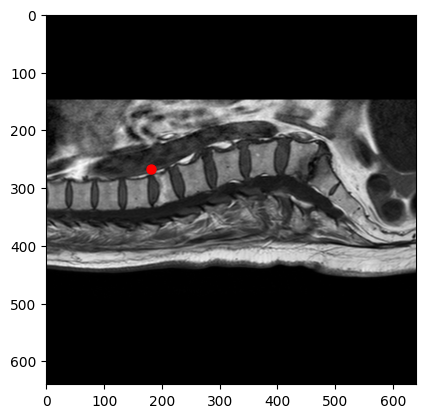

In [ ]:
plt.imshow(images['P1'][:,:,2], cmap='gray')
plt.imshow(images['P1'][:,:,5],cmap='gray', zorder=0)
plt.scatter(182,267, color='red', s=42,zorder=1)
plt.show()

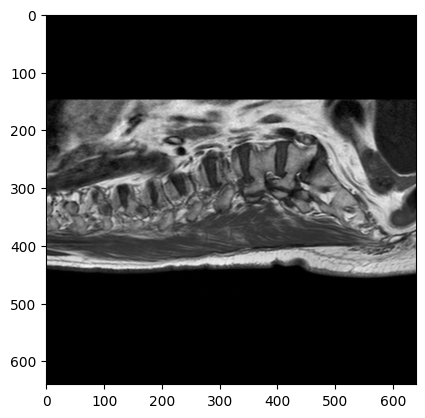

(640, 640, 14)


In [ ]:
plt.imshow(images['P1'][:,:,2], cmap='gray')
plt.show()

print(images['P1'][:,:].shape)
#masks_header['P1L1']

In [ ]:
wd = "/content/drive/MyDrive/Imagens/"
os.chdir(wd)
# Leitura dos dados do arquivo Excel 'Patients.xlsx'
df = pd.read_excel('Patients.xlsx')

# Diretório para as imagens originais
cwd = "/content/drive/MyDrive/Imagens/2-Rescaled_256_NRRD"
os.chdir(cwd)

# Criação das pastas para imagens benignas e malignas
benign_folder = 'BENIGN'
malignant_folder = 'MALIGNANT'

if not os.path.exists(benign_folder):
    os.makedirs(benign_folder)

if not os.path.exists(malignant_folder):
    os.makedirs(malignant_folder)

# Movimento dos arquivos .nrrd para suas respectivas pastas (benignas ou malignas)
for index, row in df.iterrows():
    file_name = f"{row['Id']}" + '.nrrd'
    origin = os.path.join(cwd, file_name)
    destiny = os.path.join(benign_folder if row['Class'] == 'benign' else malignant_folder, file_name)

    shutil.move(origin, destiny)

print("Arquivos .nrrd movidos com sucesso.")
os.chdir(wd)

# Diretório para as máscaras de segmentação
nwd = "/content/drive/MyDrive/Imagens/3-Segmentation_NRRD"
os.chdir(nwd)

# Criação das pastas para imagens de máscaras benignas e malignas
benign_folder = 'BENIGN'
malignant_folder = 'MALIGNANT'

if not os.path.exists(benign_folder):
    os.makedirs(benign_folder)

if not os.path.exists(malignant_folder):
    os.makedirs(malignant_folder)

# Movimento dos arquivos .seg.nrrd para suas respectivas pastas (benignas ou malignas)
for index, row in df.iterrows():
    locais = row['Segmented Vertebra'].split('/')

    for local in locais:
        nome_arquivo = f"{row['Id']}{local}.seg.nrrd"
        origem = os.path.join(nwd, nome_arquivo)
        destino = os.path.join(benign_folder if row['Class'] == 'benign' else malignant_folder, nome_arquivo)

        shutil.move(origem, destino)

print("Arquivos .seg.nrrd movidos com sucesso.")


Arquivos .nrrd movidos com sucesso.
Arquivos .seg.nrrd movidos com sucesso.


In [ ]:
# Configurações para processamento e salvamento das imagens
malignos = False  # Altere para False se deseja processar imagens benignas
benignos = True # Altere para True se deseja processar imagens benignas

# Definições de diretórios e extensões
if malignos == True:
    classe = 'MALIGNANT/'
    classe_save = 'malignant.'
elif benignos == True:
    classe = 'BENIGN/'
    classe_save = 'benign.'

path_exam = wd + '/2-Rescaled_256_NRRD/' + classe
extension_exams = '.nrrd'

path_mask = wd + '3-Segmentation_NRRD/' + classe
extension_masks = '.seg.nrrd'

benign = 'benign'
malignant = 'malignant'

if not os.path.exists(benign):
    os.makedirs(benign)

if not os.path.exists(malignant):
    os.makedirs(malignant)


In [ ]:
# Definição das dimensões das imagens
img_rows = 150
img_cols = 150
cont = 0
file_image_to_save = ''
lesoes_num = {}

# Definição da função para pré-processamento e salvamento das imagens
def preprocess_image(image):
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        # Adicione outras transformações desejadas
    ])

    # Aplica data augmentation
    augmented_image = data_augmentation(image)

    # Outras operações de pré-processamento podem ser feitas aqui

    return augmented_image


In [ ]:
def crop_save_func(path_file_exam, path_file_mask):
    global cont
    global lesoes_num

    image_exam, reader_exam = nrrd.read(path_file_exam)
    image_mask, reader_mask = nrrd.read(path_file_mask)

    #print(image_mask.shape)
    refImY,refImX,refImZ = list(map(int, reader_mask['Segmentation_ReferenceImageExtentOffset'].split()))
    #print(f'refImY: {refImY} refImX: {refImX} refImZ: {refImZ}')

    #pegando o tamanhoda máscara
    sizeMaskY, sizeMaskX = image_mask[:,:,0].shape

    #inicializando matriz segmentos
    segmentos = np.zeros(image_exam.shape[0:2])

    #colocando um corte da máscara dentro da matriz segmentos
    segmentos[refImY:refImY+sizeMaskY,refImX:refImX+sizeMaskX] = segmentos[refImY:refImY+sizeMaskY,refImX:refImX+sizeMaskX] + image_mask[:,:,0]

    #multiplicando a imagem original pela máscara
    segmentos = segmentos*image_exam[:,:,refImZ]

    segmentos = submatrix(segmentos)

    lesao = set_background(segmentos)



    plt.imshow(lesao, cmap='gray' )
    #plt.show()
    #plt.axis("off")
    print(file_image_to_save)
    lesoes_num[file_image_to_save] = cont
    plt.savefig(classe + classe_save + str(cont) + ".png")


def submatrix(arr):
    x, y = np.nonzero(arr)
    #print(f'x {x} y {y}')
    # Using the smallest and largest x and y indices of nonzero elements,
    # we can find the desired rectangular bounds.
    # And don't forget to add 1 to the top bound to avoid the fencepost problem.
    return arr[x.min():x.max()+1, y.min():y.max()+1]

def set_background(img):
    img = Image.fromarray(np.uint16(img))

    #plt.imshow(img, cmap='gray' )
    #plt.show()

    background = np.zeros((img_rows, img_cols))

    d1 = img.size[0]
    d2 = img.size[1]
    #print(d1)
    #print(d2)

    PIL_background = Image.fromarray(np.uint16(background))

    pos1 = math.floor((img_rows - d1) / 2)
    pos2 = math.floor((img_cols - d2) / 2)
    #print(pos1)
    #print(pos2)

    PIL_background.paste(img, (pos1, pos2))

    PIL_background = np.array(PIL_background)

    PIL_background = PIL_background.astype("uint16")

    return PIL_background

P1L1.seg.nrrd
P10L1.seg.nrrd
P10L2.seg.nrrd
P10L3.seg.nrrd
P10L4.seg.nrrd
P10L5.seg.nrrd
P14L1.seg.nrrd
P14L3.seg.nrrd
P16L1.seg.nrrd
P16L2.seg.nrrd
P18L4.seg.nrrd
P19L1.seg.nrrd
P2L1.seg.nrrd
P2L3.seg.nrrd
P2L5.seg.nrrd
P20L1.seg.nrrd
P21L2.seg.nrrd
P22L2.seg.nrrd
P24L2.seg.nrrd
P24L3.seg.nrrd
P24L5.seg.nrrd
P27L4.seg.nrrd
P29L1.seg.nrrd
P3L1.seg.nrrd
P30L1.seg.nrrd
P31L1.seg.nrrd
P32L1.seg.nrrd
P32L4.seg.nrrd
P33L1.seg.nrrd
P34L1.seg.nrrd
P35L1.seg.nrrd
P35L2.seg.nrrd
P35L3.seg.nrrd
P35L4.seg.nrrd
P35L5.seg.nrrd
P4L3.seg.nrrd
P5L1.seg.nrrd
P5L4.seg.nrrd
P53L1.seg.nrrd
P54L1.seg.nrrd
P55L2.seg.nrrd
P55L3.seg.nrrd
P56L1.seg.nrrd
P56L2.seg.nrrd
P57L1.seg.nrrd
P59L4.seg.nrrd
P6L1.seg.nrrd
P6L3.seg.nrrd
P6L5.seg.nrrd
P60L2.seg.nrrd
P62L4.seg.nrrd
P63L4.seg.nrrd
P64L2.seg.nrrd
P65L1.seg.nrrd
P66L4.seg.nrrd
P67L3.seg.nrrd
P68L1.seg.nrrd
P69L3.seg.nrrd
P70L3.seg.nrrd
P71L2.seg.nrrd
P8L3.seg.nrrd
P8L4.seg.nrrd
P8L5.seg.nrrd
P82L2.seg.nrrd
P83L3.seg.nrrd
P84L3.seg.nrrd
P85L1.seg.nrrd
P86L2.seg

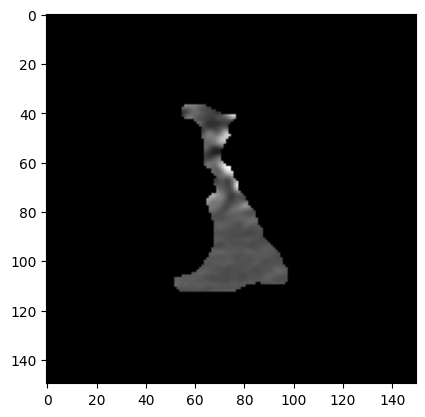

In [ ]:
# Iteração sobre os arquivos para processar as imagens
contents_exams = os.listdir(path_exam)
contents_exams = sorted(contents_exams)
contents_masks = os.listdir(path_mask)
contents_masks = sorted(contents_masks)

# Iteração sobre os exames e suas máscaras correspondentes
for file_aux1 in contents_exams:
    if file_aux1.endswith('.nrrd'):
        path_file_exam = f'{path_exam}{file_aux1}'

        file_exam_aux = path_file_exam.split('/')[-1]
        idx1 = file_exam_aux.index(extension_exams)
        file_exam = file_exam_aux[:idx1]

        for file_aux2 in contents_masks:
            if file_aux2.endswith('.nrrd'):
                path_file_mask = f'{path_mask}{file_aux2}'

                file_mask_aux = path_file_mask.split('/')[-1]
                idx2 = file_mask_aux.index(extension_masks)
                file_mask = file_mask_aux[:idx2]

                if (len(file_exam) == 2 and len(file_mask) == 4):
                    file_mask = file_mask[0:2]

                    if (file_exam == file_mask):
                        cont += 1
                        file_image_to_save = file_mask_aux
                        crop_save_func(path_file_exam, path_file_mask)

                if (len(file_exam) == 3 and len(file_mask) == 5):
                    file_mask = file_mask[0:3]

                    if (file_exam == file_mask):
                        cont += 1
                        file_image_to_save = file_mask_aux
                        crop_save_func(path_file_exam, path_file_mask)

# Impressão da numeração da lesão
for lesao, num in lesoes_num.items():
     print(lesao, num)


In [ ]:
#shutil: responsável por manipular os arquivos, dividi-los copiando de uma pasta para passar pra outra
import os, shutil
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = r'/content/drive/MyDrive/Imagens/Base'

# The directory where we will
# store our smaller dataset
#base divida não existe ainda
base_dir = r'/content/drive/MyDrive/Imagens/Base/BaseDividida'
os.mkdir(base_dir)
#base dividida criada dentro do base (onde tem todas as imagens)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
#subdiretorios criados para treino
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
#subdiretorios criados para validação
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
#subdiretorios criados para teste

# Directory with our training benign pictures
train_benign_dir = os.path.join(train_dir, 'benign')
os.mkdir(train_benign_dir)
# Directory with our training dog pictures
train_malignant_dir = os.path.join(train_dir, 'malignant')
os.mkdir(train_malignant_dir)

# Directory with our validation benign pictures
validation_benign_dir = os.path.join(validation_dir, 'benign')
os.mkdir(validation_benign_dir)
# Directory with our validation dog pictures
validation_malignant_dir = os.path.join(validation_dir, 'malignant')
os.mkdir(validation_malignant_dir)

# Directory with our test benign pictures
test_benign_dir = os.path.join(test_dir, 'benign')
os.mkdir(test_benign_dir)
# Directory with our test malignant pictures
test_malignant_dir = os.path.join(test_dir, 'malignant')
os.mkdir(test_malignant_dir)

# Copy first 30 benign images to train_benign_dir
#vai pegar de 1 até 47
#a função format aloca o i no nome da imagem
fnames = ['benign.{}.png'.format(i) for i in range(1, 48)]
for fname in fnames:
  #neste for esta sendo usado o pacote shutil para copiar o arquivo da pasta base para a pasta de treinamento dos casos benignos
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_benign_dir, fname)
    #copia de src para dst
    shutil.copyfile(src, dst)

#30 foi considerado 80% do total de imagens benignas 1 -> 48

# Copy next 8 beign images to validation_benign_dir
fnames = ['benign.{}.png'.format(i) for i in range(48, 55)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_benign_dir, fname)
    shutil.copyfile(src, dst)

#30 foi considerado 20% do total de imagens benignas 48 -> 55

#Para os casos de teste não precisa necessariamente de uma proporção balanceada, mas nos casos de treinamento e validação sim
# Copy next benign images to test_benign_dir
fnames = ['benign.{}.png'.format(i) for i in range(55, 70)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_benign_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 30 malignant images to train_malignant_dir
fnames = ['malignant.{}.png'.format(i) for i in range(1, 48)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_malignant_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 8 malignant images to validation_malignant_dir
fnames = ['malignant.{}.png'.format(i) for i in range(48, 55)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_malignant_dir, fname)
    shutil.copyfile(src, dst)

# Copy next malignant images to test_malignant_dir
fnames = ['malignant.{}.png'.format(i) for i in range(55, 62)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_malignant_dir, fname)
    shutil.copyfile(src, dst)

#a funcão listdir do pacote os lista arquivos de uma pasta especificada no parâmetro
#o len pega o tamanho de algo, neste caso, a quantidade de arquivos em cada pasta
print('total training benign images:', len(os.listdir(train_benign_dir)))
print('total training malignant images:', len(os.listdir(train_malignant_dir)))
print('total validation benign images:', len(os.listdir(validation_benign_dir)))
print('total validation malignant images:', len(os.listdir(validation_malignant_dir)))
print('total test benign images:', len(os.listdir(test_benign_dir)))
print('total test malignant images:', len(os.listdir(test_malignant_dir)))


total training benign images: 47
total training malignant images: 47
total validation benign images: 7
total validation malignant images: 7
total test benign images: 15
total test malignant images: 7


In [ ]:
Aumentando a base

In [ ]:
from PIL import Image
import os

def aumentar_e_rotacionar_imagens(pasta_entrada, pasta_saida):
    if not os.path.exists(pasta_saida):
        os.makedirs(pasta_saida)

    for arquivo in os.listdir(pasta_entrada):
        if arquivo.endswith('.png'):
            caminho_imagem = os.path.join(pasta_entrada, arquivo)
            imagem = Image.open(caminho_imagem)

            # Criando versões rotacionadas da imagem original
            for angulo in [90, 180, 270]:
                imagem_rotacionada = imagem.rotate(angulo, expand=True)
                nome_arquivo_saida = f"{os.path.splitext(arquivo)[0]}_{angulo}graus.png"
                caminho_saida = os.path.join(pasta_saida, nome_arquivo_saida)
                imagem_rotacionada.save(caminho_saida)

            # Salvar a imagem original também na pasta de saída
            nome_arquivo_original = f"{os.path.splitext(arquivo)[0]}_0graus.png"
            caminho_saida_original = os.path.join(pasta_saida, nome_arquivo_original)
            imagem.save(caminho_saida_original)

# Defina a pasta de entrada e a pasta de saída
pasta_entrada = "/content/drive/MyDrive/Imagens/Base/BaseDividida/train/malignant" #Altere para o caminho 'benign' para obter a pasta benign aumentada
pasta_saida = "/content/drive/MyDrive/Imagens/Base/BaseDividida/train/malignantAumentada" # Pasta de destino para a base aumentada

aumentar_e_rotacionar_imagens(pasta_entrada, pasta_saida)

In [ ]:
from keras.applications import VGG16
from keras import layers
from keras import models
from keras import optimizers

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base
base_model.trainable = False

# Create a new model on top
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Found 376 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


<ipython-input-37-116ac89c56d7>:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
188/188 [==============================] - 122s 643ms/step - loss: 1.2380 - acc: 0.6037 - val_loss: 0.7905 - val_acc: 0.5714
Epoch 2/30
188/188 [==============================] - 118s 624ms/step - loss: 0.6792 - acc: 0.6250 - val_loss: 0.8111 - val_acc: 0.5714
Epoch 3/30
188/188 [==============================] - 120s 637ms/step - loss: 0.5968 - acc: 0.6968 - val_loss: 0.8991 - val_acc: 0.6429
Epoch 4/30
188/188 [==============================] - 116s 617ms/step - loss: 0.5786 - acc: 0.7048 - val_loss: 0.6686 - val_acc: 0.7143
Epoch 5/30
188/188 [==============================] - 123s 651ms/step - loss: 0.5679 - acc: 0.7447 - val_loss: 0.6501 - val_acc: 0.7857
Epoch 6/30
188/188 [==============================] - 116s 618ms/step - loss: 0.5402 - acc: 0.7367 - val_loss: 0.7525 - val_acc: 0.7143
Epoch 7/30
188/188 [==============================] - 116s 620ms/step - loss: 0.5464 - acc: 0.7527 - val_loss: 0.6344 - val_acc: 0.7143
Epoch 8/30
188/188 [============================

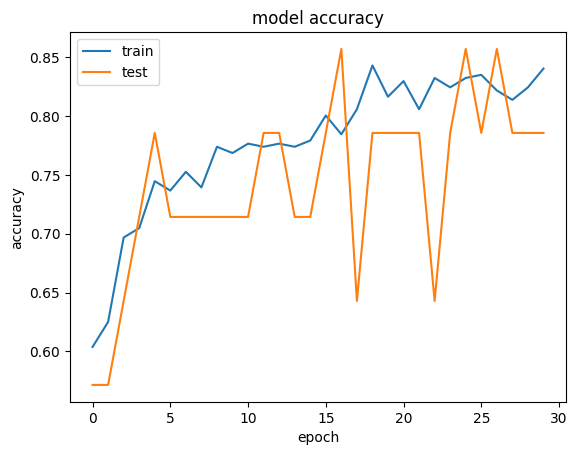

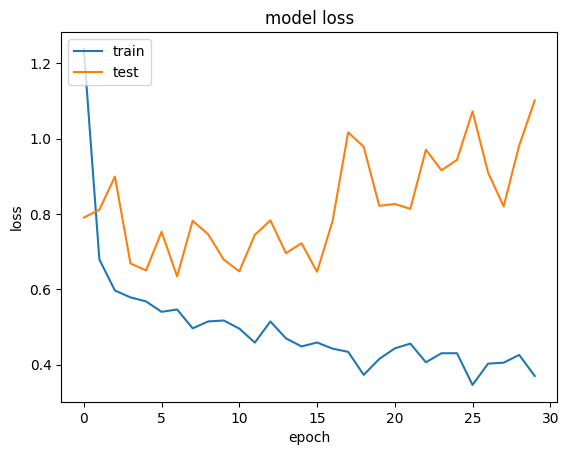

Found 22 images belonging to 2 classes.
11/11 [==============================] - 6s 549ms/step - loss: 0.5437 - acc: 0.9091
test acc: 0.9090909361839294


In [ ]:
#resumindo o modelo conforme ocorre a aplicação das convoluções
#max_pooling2D ira diminuir a dimensão das imagens pela metade e aplicar um kernel de tamanho 2x2 e pegar o maior valor daquela matriz para gerar a proxima convolução
#max_pooling2D serve para diminuir a quantidade de nós que você tem na rede, para otmizar o tempo de treinamento e muitas vezes melhorar o resultado
model.summary()

from tensorflow.keras import optimizers

#defini-se a função da taxa de perda
#o optimizer é a função que vai fazendo os ajustes dos pesos dos filtros para melhorar o treinamento da rede
#RMSprop é o otmizador escolhido
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
#o acc é a acuracia do treinamento da rede
metrics=['acc'])

"""Validação: busca-se estimar o quão preciso é um modelo na prática, ou seja, o seu desempenho em um novo conjunto de dados.

Idealmente, o modelo deve ser avaliado em amostras que não foram usadas para construir ou ajustar o modelo, de modo que forneçam um senso imparcial de eficácia do modelo. Quando uma grande quantidade de dados está à mão, um conjunto de amostras pode ser reservado para avaliar o modelo final - este é o set de teste - que não deve ser tocado até esta avaliação final. O set de treinamento é usado  para criar o modelo, enquanto o set de validação é usado para ajustar o desempenho.
"""

from keras.preprocessing.image import ImageDataGenerator
#nesta célula fazemos um pré processamento bem simples

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=2,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        #colocando um batch size menor é consumido menos memória
        batch_size=2,
        #como nosso problema envolve duas classes, usamos o modo binário
        class_mode='binary')

#aqui é feito o treinamento
#o fit é o que faz o treinamento, e o generator é uma forma de usa-lo
history = model.fit_generator(
train_generator,
#epochs é a quantidade de ciclos de treinamento que nossa rede irá fazer
#se aumenta muito a epoch pode ser que dê overfitting
epochs=30,
#a base de validação é a base alvo para testar se a rede esta sabendo diferencias se a classificação esta acontecendo corretamente
validation_data=validation_generator)

#loss é a taxa de perda do treinamento
#acc --> acuracia

#existem funções para voltarmos na rede de algum ciclo que teve a melhor acuracia, checkpoint

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=2,
class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

1/1 [==============================] - 7s 7s/step


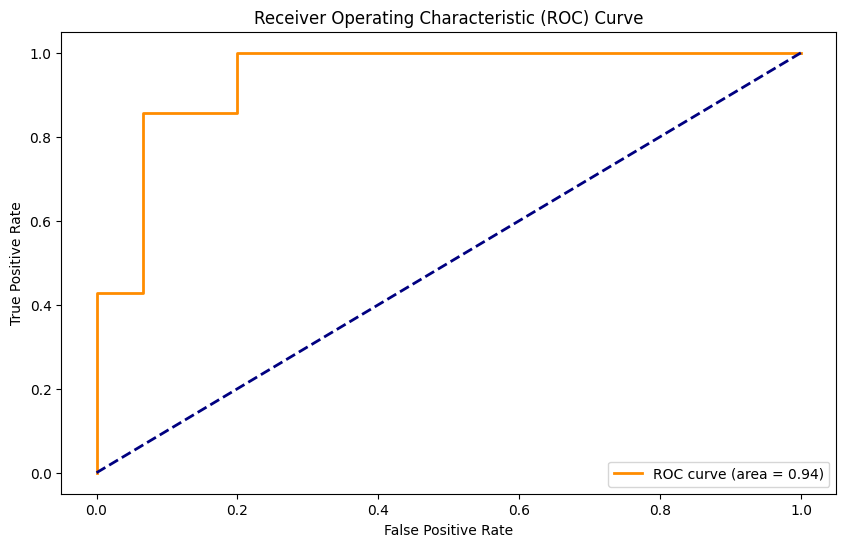

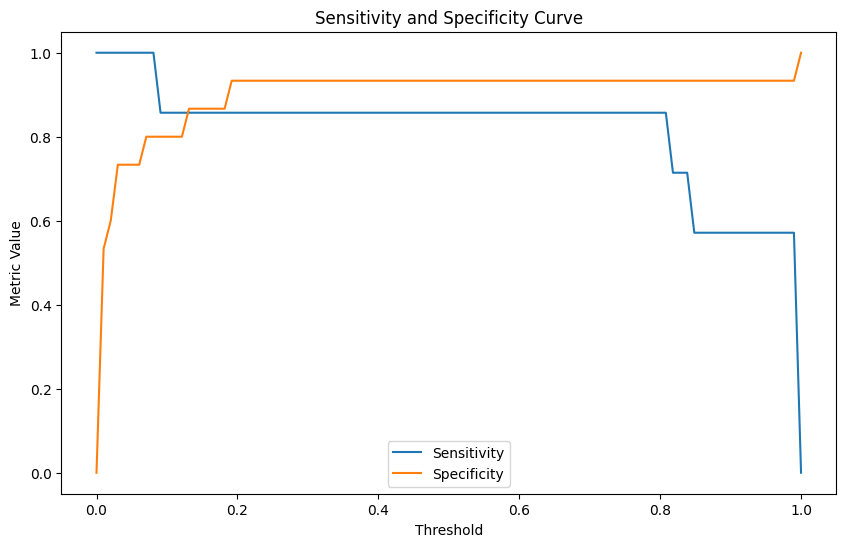

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Suponha que 'model' é o seu modelo treinado
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Gerar previsões para o conjunto de teste
y_pred = model.predict(test_generator)

# Calcular a matriz de confusão
y_true = test_generator.classes
y_pred_classes = np.round(y_pred)
conf_matrix = confusion_matrix(y_true, y_pred_classes)


# Calcular sensibilidade e especificidade para diferentes thresholds
thresholds = np.linspace(0, 1, 100)
sensitivities = []
specificities = []

for threshold in thresholds:
    y_pred_threshold = (y_pred > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_threshold).ravel()

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Plotar a curva de ROC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plotar a curva de sensibilidade e especificidade
plt.figure(figsize=(10, 6))
plt.plot(thresholds, sensitivities, label='Sensitivity')
plt.plot(thresholds, specificities, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Sensitivity and Specificity Curve')
plt.legend()

plt.show()

model.save('seu_modelo.h5')

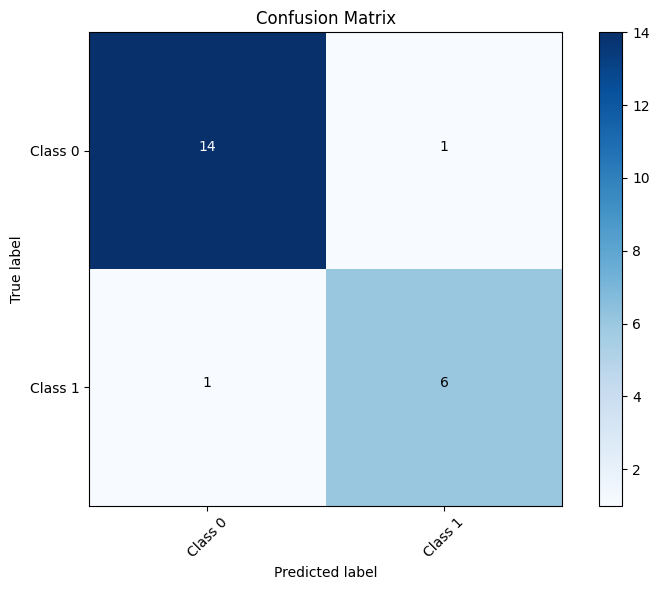

In [ ]:
import itertools

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotar a matriz de confusão
class_names = ['Class 0', 'Class 1']  # Substitua com os nomes das suas classes
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()


In [ ]:
# Utilizando a matriz de confusão já calculada
tn, fp, fn, tp = conf_matrix.ravel()

# Calcular sensibilidade e especificidade
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensibilidade: {sensitivity:.4f}')
print(f'Especificidade: {specificity:.4f}')


Sensibilidade: 0.8571
Especificidade: 0.9333
